In [1]:
import pandas as pd
import numpy as nm

#for Label Encoding
from sklearn.preprocessing import LabelEncoder

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for Data splitting
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\Machine Learning Models\Dataset\email_dataset.csv')
df.shape

(5695, 2)

In [3]:
df

,text,spam
0,Subject: logistics for the sycamore meeting in...,0
1,Subject: ll visa - anshuman shrivastava anshu...,0
2,"Subject: re : for your approval erica , yes ...",0
3,Subject: new medz how t cornel o save on your...,1
4,"Subject: tiger team info vince , here is the...",0
...,...,...
5690,"Subject: benchmarking study sally , i gave y...",0
5691,Subject: energy book vl . 0 vince : i have r...,0
5692,Subject: re : friday brown bag lunch on option...,0
5693,Subject: interim report to gary hickerson for ...,0


In [4]:
df.shape

(5695, 2)

In [5]:
df['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

# DATA PRE-PROCESSING

In [6]:
df=df.drop_duplicates(keep='first')

In [7]:
df

,text,spam
0,Subject: logistics for the sycamore meeting in...,0
1,Subject: ll visa - anshuman shrivastava anshu...,0
2,"Subject: re : for your approval erica , yes ...",0
3,Subject: new medz how t cornel o save on your...,1
4,"Subject: tiger team info vince , here is the...",0
...,...,...
5690,"Subject: benchmarking study sally , i gave y...",0
5691,Subject: energy book vl . 0 vince : i have r...,0
5692,Subject: re : friday brown bag lunch on option...,0
5693,Subject: interim report to gary hickerson for ...,0


#### Word Count

In [8]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
0,Subject: logistics for the sycamore meeting in...,755
1,Subject: ll visa - anshuman shrivastava anshu...,416
2,"Subject: re : for your approval erica , yes ...",341
3,Subject: new medz how t cornel o save on your...,107
4,"Subject: tiger team info vince , here is the...",315


In [9]:
df.word_count.describe()

count    5695.000000
mean      358.137313
std       452.047939
min         3.000000
25%       112.500000
50%       232.000000
75%       439.000000
max      8984.000000
Name: word_count, dtype: float64

# DATA CLEANING

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")
porter_stemmer = PorterStemmer()

from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words=stopwords.words("english")

### Removing Punctuation Marks

In [11]:
import string
def dataClean(text):
    message = re.sub('[^a-zA-Z]',' ', text)
    message = message.split()
    return " ".join(message)

df['text'] = df['text'].apply(dataClean)
df.head(n = 10)

,text,spam,word_count
0,Subject logistics for the sycamore meeting in ...,0,755
1,Subject ll visa anshuman shrivastava anshuman ...,0,416
2,Subject re for your approval erica yes no prob...,0,341
3,Subject new medz how t cornel o save on your m...,1,107
4,Subject tiger team info vince here is the info...,0,315
5,Subject professor bambos visit shirley profess...,0,83
6,Subject re mscf speaker series recruitment tha...,0,162
7,Subject re your visit to enron joe fyi please ...,0,1166
8,Subject re from larry roberts thanks for the r...,0,87
9,Subject fw resume for vince kaminski we just r...,0,310


### Converting to Lowercase

In [12]:
import string
def lowercase(text):
    message = text.lower()
    return message

df['text'] = df['text'].apply(lowercase)
df.head(n = 10)

,text,spam,word_count
0,subject logistics for the sycamore meeting in ...,0,755
1,subject ll visa anshuman shrivastava anshuman ...,0,416
2,subject re for your approval erica yes no prob...,0,341
3,subject new medz how t cornel o save on your m...,1,107
4,subject tiger team info vince here is the info...,0,315
5,subject professor bambos visit shirley profess...,0,83
6,subject re mscf speaker series recruitment tha...,0,162
7,subject re your visit to enron joe fyi please ...,0,1166
8,subject re from larry roberts thanks for the r...,0,87
9,subject fw resume for vince kaminski we just r...,0,310


### Stemming & Lemmatisation

In [13]:
import string
def stemming_lemmatisation(text):
    message = text.split()
    words = [snowball_stemmer.stem(word) for word in message if word not in stop_words]
    lem = WordNetLemmatizer()
    words = [lem.lemmatize(word) for word in message if not word in  stop_words]
    return " ".join(words)

df["text"] = df["text"].apply(stemming_lemmatisation)
df.head(n = 10)

,text,spam,word_count
0,subject logistics sycamore meeting chelmsford ...,0,755
1,subject visa anshuman shrivastava anshuman ple...,0,416
2,subject approval erica yes problem vince infor...,0,341
3,subject new medz cornel save medlcations pharm...,1,107
4,subject tiger team info vince info tiger team ...,0,315
5,subject professor bambos visit shirley profess...,0,83
6,subject mscf speaker series recruitment thanks...,0,162
7,subject visit enron joe fyi please plan attend...,0,1166
8,subject larry robert thanks referral matter wa...,0,87
9,subject fw resume vince kaminski received resu...,0,310


# FEATURE EXTRACTION AND VECTORIZATION

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],df['spam'],test_size=0.2,random_state=57)

In [16]:
X_train

1568    subject phone time dear dr kaminski thanks arr...
4920    subject christmas basket kevin please add copy...
4618    subject electricity conference update apex con...
4809    subject congratulation vince congratulation pr...
1553    subject fma european conference john book arri...
                              ...                        
3151    subject charles shen molly would tanya vince e...
4502    subject price cap forwarded vladimir gorny hou...
3077    subject yaron resume kevin would greatly appre...
3798    subject fma european conference fine want chan...
3023    subject works good want know save overrode pii...
Name: text, Length: 4556, dtype: object

In [17]:
def features_transform(mail_text):
    #form bag of words using countvectorizer
    transformer = CountVectorizer(max_features=27000).fit(X_train)
    bag_of_words = transformer.transform(mail_text)
     
    #apply the TF-IDF transform to the output of BOW
    tfidf_transformer = TfidfTransformer().fit(bag_of_words)
    tfidf_texts = tfidf_transformer.transform(bag_of_words)
    
    #return result of transforms
    return tfidf_texts

In [18]:
cv=CountVectorizer(max_features=27000).fit(X_train)

In [19]:
X_train_features=features_transform(X_train)
X_test_features=features_transform(X_test)

In [20]:
import pickle
pickle.dump(cv, open('transform.pkl', 'wb'))

In [21]:
X_train_features.shape

(4556, 27000)

In [22]:
df['text'][8]

'subject larry robert thanks referral matter want best honor affirmative action accessibility responsibility people plan satisfy least priority point web content accessibility guideline put world wide web consortium addition continue monitor improve develop new tool thanks good weekend'

In [24]:
# print(X_train_features.shape[5][:])

# MODEL TRAINING

In [25]:
def generate_accuracy_and_heatmap(model, x, y): # This is a multi label classification problem
    confusion_m = confusion_matrix(y,model.predict(x))
    sns.heatmap(confusion_m,annot=True,fmt="d")
    ac="{:.2f}".format(accuracy_score(y,model.predict(x))*100)
    print('Accuracy : ', ac,'%')
    print("Y axis : Actual Value.")
    print("X axis : Predicted Value.")
    return 1

## Multinomial Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_features, Y_train)

MultinomialNB()

Accuracy :  87.27 %
Y axis : Actual Value.
X axis : Predicted Value.


1

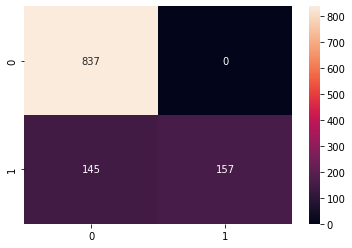

In [27]:
generate_accuracy_and_heatmap(clf_mnb, X_test_features, Y_test)

## Complement Naive Bayes

In [28]:
from sklearn.naive_bayes import ComplementNB
clf_cnb = ComplementNB()
clf_cnb.fit(X_train_features, Y_train)

ComplementNB()

Accuracy :  94.29 %
Y axis : Actual Value.
X axis : Predicted Value.


1

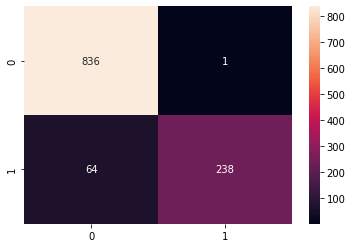

In [29]:
generate_accuracy_and_heatmap(clf_cnb, X_test_features, Y_test)

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf_DT=DecisionTreeClassifier(random_state=0 , max_depth=18)
clf_DT.fit(X_train_features, Y_train)

DecisionTreeClassifier(max_depth=18, random_state=0)

Accuracy :  96.14 %
Y axis : Actual Value.
X axis : Predicted Value.


1

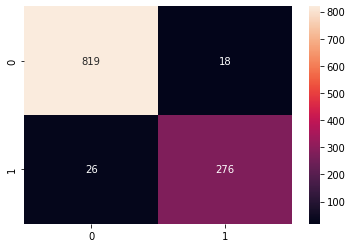

In [31]:
generate_accuracy_and_heatmap(clf_DT, X_test_features, Y_test)

## XGBoost Classifier

In [32]:
import xgboost as xgb
xgb_xgb = xgb.XGBClassifier()
xgb_xgb.fit(X_train_features, Y_train)

[23:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy :  97.45 %
Y axis : Actual Value.
X axis : Predicted Value.


1

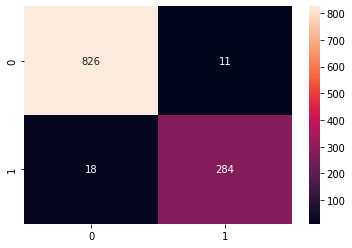

In [33]:
generate_accuracy_and_heatmap(xgb_xgb, X_test_features, Y_test)

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(criterion='entropy', max_depth= 9, max_features= 'sqrt', n_estimators= 200, random_state=34)
clf_rf.fit(X_train_features, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       n_estimators=200, random_state=34)

Accuracy :  79.19 %
Y axis : Actual Value.
X axis : Predicted Value.


1

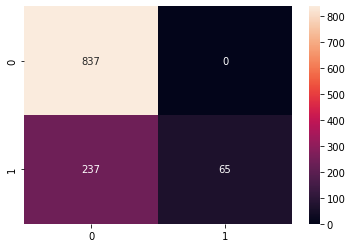

In [35]:
generate_accuracy_and_heatmap(clf_rf, X_test_features, Y_test)

## Light Gradient Boosting Machine

In [36]:
import lightgbm as lgb
clf_lgbm = lgb.LGBMClassifier()
clf_lgbm.fit(X_train_features, Y_train)

LGBMClassifier()

Accuracy :  98.42 %
Y axis : Actual Value.
X axis : Predicted Value.


1

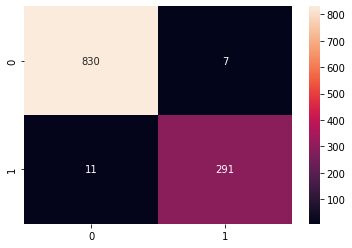

In [37]:
generate_accuracy_and_heatmap(clf_lgbm, X_test_features, Y_test)

# Result Visualisation

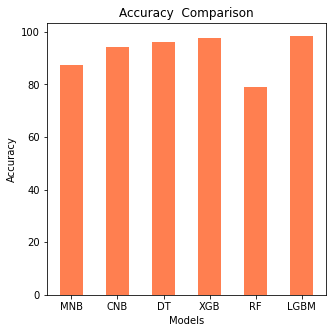

In [38]:
import matplotlib.pyplot as plt

accuracy_dict = {'MNB':87.27,'CNB':94.29,'DT':96.14,'XGB': 97.45,'RF':79.19, 'LGBM':98.42}
models = list(accuracy_dict.keys())
accuracies = list(accuracy_dict.values())
fig = plt.figure(figsize = (5, 5))
#  Bar plot
plt.bar(models, accuracies, color ='coral',width = 0.5)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy  Comparison")
plt.show()

# Transforming into Pickle file

In [39]:
import pickle
pickle.dump(clf_lgbm,open('SpamEmailDetection.pkl','wb'))